### Problem statement

#### 1. Load data

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
customer_data = pd.read_csv("./train.csv")

In [3]:
customer_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

no     3652
yes     598
Name: churn, dtype: int64


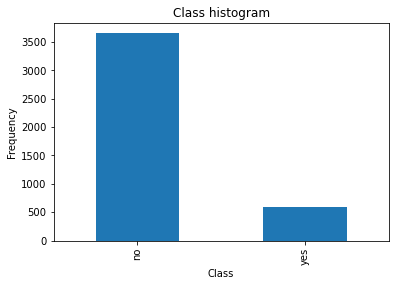

In [5]:
# CHECKING THE TARGET CLASSES:
count_classes = pd.value_counts(customer_data['churn'], sort = True).sort_index()
print(count_classes)
count_classes.plot(kind = 'bar')
plt.title("Class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

##### This dataset is imbalanced, we will try some methods to fix this issues later

#### 2. Preprocess Data

In [6]:
customer_data.isnull().sum() # check missing values

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
# Check object columns
object_cols = [i for i in customer_data.columns if customer_data[i].dtype == "O"]
print(object_cols)

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


In [8]:
# Check numerical columns
numerical_cols = [j for j in customer_data.columns if customer_data[j].dtype != "O"]
print(numerical_cols)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [9]:
df = customer_data.copy()

In [10]:
df.shape

(4250, 20)

In [11]:
# Check categorical value in our dataset features
category_col = df.select_dtypes(include=['object','category']).columns.tolist()
for column in df[category_col]:
    print(f'{column} : {df[column].unique()}')
    print()

state : ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']

area_code : ['area_code_415' 'area_code_408' 'area_code_510']

international_plan : ['no' 'yes']

voice_mail_plan : ['yes' 'no']

churn : ['no' 'yes']



In [12]:
# Label encode
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df_encode = df.copy()
for col in df_encode.select_dtypes(include='O').columns:
    df_encode[col] = le.fit_transform(df_encode[col])

In [13]:
df_encode.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
5,24,147,1,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
6,18,117,0,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
7,49,141,1,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
8,15,65,1,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
9,39,74,1,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0


In [14]:
# Correlation
corr = df_encode.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
state,1.0000000000,0.0088175656,0.0207125938,0.0038221798,-0.0347523173,-0.0308568149,0.0142633148,-0.0098898599,0.0142621981,0.0016029776,-0.0091157014,0.0016033592,0.0048270791,-0.0065973950,0.0048151025,-0.0102595891,0.0074690020,-0.0102839462,-0.0204213705,0.0071812572
account_length,0.0088175656,1.0000000000,-0.0235300544,0.0270499082,0.0016629710,-0.0066264510,-0.0016115552,0.0230020114,-0.0016134525,-0.0103257623,0.0055354335,-0.0103218288,-0.0099161344,-0.0018463689,-0.0099420854,0.0045387501,0.0136904837,0.0044943328,0.0010022345,0.0193784898
area_code,0.0207125938,-0.0235300544,1.0000000000,0.0271327510,-0.0016217526,-0.0024676140,0.0063440206,-0.0090638927,0.0063423474,-0.0002439701,-0.0140314925,-0.0002289219,0.0190336424,0.0228686384,0.0190307772,0.0136412209,-0.0070265246,0.0135181865,0.0110641013,0.0106961779
international_plan,0.0038221798,0.0270499082,0.0271327510,1.0000000000,0.0007141261,0.0048080648,0.0400593911,0.0097759322,0.0400609277,0.0234835647,-0.0030043314,0.0234790969,-0.0206939710,0.0071533565,-0.0206937798,0.0238153764,0.0069562252,0.0237987801,-0.0088813808,0.2590529004
voice_mail_plan,-0.0347523173,0.0016629710,-0.0016217526,0.0007141261,1.0000000000,0.9540138631,-0.0006529816,-0.0100037683,-0.0006581128,0.0119824285,0.0002625977,0.0119892520,0.0178840886,0.0078722130,0.0178751536,0.0080983863,-0.0056742769,0.0081289976,-0.0215039084,-0.1146425774
number_vmail_messages,-0.0308568149,-0.0066264510,-0.0024676140,0.0048080648,0.9540138631,1.0000000000,0.0019997103,-0.0069204933,0.0019943764,0.0107251107,0.0035932555,0.0107357264,0.0183079010,0.0019773186,0.0182996110,0.0052198841,0.0065851526,0.0052486234,-0.0153032539,-0.1003465279
total_day_minutes,0.0142633148,-0.0016115552,0.0063440206,0.0400593911,-0.0006529816,0.0019997103,1.0000000000,0.0007465059,0.9999999518,-0.0132479940,0.0059858263,-0.0132583096,0.0100490688,-0.0048122088,0.0100363193,-0.0213691198,0.0038585128,-0.0212912432,-0.0029245552,0.2152716011
total_day_calls,-0.0098898599,0.0230020114,-0.0090638927,0.0097759322,-0.0100037683,-0.0069204933,0.0007465059,1.0000000000,0.0007505542,0.0086613898,0.0037389726,0.0086632520,0.0022061706,-0.0048154925,0.0021995059,0.0088340101,0.0093765582,0.0089092835,-0.0158454223,0.0116404222
total_day_charge,0.0142621981,-0.0016134525,0.0063423474,0.0400609277,-0.0006581128,0.0019943764,0.9999999518,0.0007505542,1.0000000000,-0.0132471377,0.0059850899,-0.0132574552,0.0100531900,-0.0048156845,0.0100404354,-0.0213741754,0.0038534976,-0.0212963093,-0.0029317820,0.2152632175
total_eve_minutes,0.0016029776,-0.0103257623,-0.0002439701,0.0234835647,0.0119824285,0.0107251107,-0.0132479940,0.0086613898,-0.0132471377,1.0000000000,0.0031008093,0.9999997722,-0.0140181323,0.0119732209,-0.0140308672,-0.0035094809,0.0122388291,-0.0034604293,-0.0100630561,0.0788552183


In [15]:
# Remove high correlation columns
removed_df = df_encode.drop(columns=["voice_mail_plan","number_vmail_messages","total_day_charge","total_eve_charge","total_night_charge","total_intl_minutes","total_intl_charge"])

In [16]:
removed_df.shape

(4250, 13)

#### 3. Training Experiment

Firstly, use the original encoded dataset for training (haven't removed high correlation columns yet)

In [17]:
# Assigning X and Y
X = df_encode.iloc[:, df_encode.columns != 'churn']
y = df_encode.iloc[:, df_encode.columns == 'churn']

In [18]:
X.shape

(4250, 19)

In [19]:
y.shape

(4250, 1)

In [20]:
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


In [21]:
y.head()

,churn
0,0
1,0
2,0
3,0
4,0


In [22]:
# Splitting data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
print("Numbers of train dataset: ", len(X_train))
print("Numbers of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train) + len(X_test))

Numbers of train dataset:  2975
Numbers of test dataset:  1275
Total number of dataset:  4250


In [24]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler

scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge','total_eve_minutes', 'total_eve_calls','total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge','total_intl_minutes',
       'total_intl_calls', 'total_intl_charge','number_customer_service_calls']

In [25]:
scaler = MinMaxScaler()
scaler.fit(X_train[scale_columns])
X_train[scale_columns] = scaler.transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

<ipython-input-25-20465172547d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[scale_columns] = scaler.transform(X_train[scale_columns])
C:\Users\tanth_000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-25-20465172547d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [26]:
X_train.shape

(2975, 19)

In [27]:
X_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
2223,44,0.575758,1,0,0,0.000000,0.736273,0.515152,0.736278,0.360423,0.670588,0.360511,0.458311,0.514085,0.458458,0.545,0.368421,0.544444,0.222222
2175,16,0.471861,2,0,0,0.000000,0.591750,0.418182,0.591700,0.264681,0.552941,0.264571,0.417698,0.676056,0.417812,0.400,0.578947,0.400000,0.111111
220,39,0.489177,2,0,1,0.538462,0.642390,0.569697,0.642403,0.537156,0.688235,0.537328,0.562668,0.471831,0.563060,0.420,0.473684,0.420370,0.444444
1783,0,0.471861,1,0,0,0.000000,0.422191,0.575758,0.422189,0.539382,0.576471,0.539293,0.491662,0.514085,0.491931,0.345,0.315789,0.344444,0.000000
3632,2,0.376623,1,0,0,0.000000,0.403129,0.618182,0.403112,0.629557,0.735294,0.629666,0.206832,0.422535,0.206814,0.595,0.421053,0.594444,0.000000


In [28]:
# Import classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve,recall_score, classification_report


def Confusion_Matrix(y_test,y_pred):
    cfmat = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix: \n', cfmat)
#     plot_confusion_matrix(model, X_test, y_test)
    print('Classification Report: \n',classification_report(y_test,y_pred,labels=[0,1]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, y_pred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,y_pred)))
    print("\n")
    print("*"*40)
    print("\n")

In [33]:
# Import classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,f1_score,classification_report


# Prepare models:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn:
results=[]
names=[]
# scoring='accuracy'
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = 100*accuracy_score(y_test, y_pred)
    results.append(result)
    names.append(name)
    print(name,':', result)
    Confusion_Matrix(y_test, y_pred)
#     print('Classification report:\n', classification_report(y_test, y_pred))

C:\Users\tanth_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LR : 87.52941176470588
Confusion Matrix: 
 [[1086   16]
 [ 143   30]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1102
           1       0.65      0.17      0.27       173

    accuracy                           0.88      1275
   macro avg       0.77      0.58      0.60      1275
weighted avg       0.85      0.88      0.84      1275



TN - True Negative 30
FP - False Positive 143
FN - False Negative 16
TP - True Positive 1086
Accuracy Rate: 0.8752941176470588
Misclassification Rate: 0.12470588235294118
F1-Score: 0.6028807672643289
ROC-AUC 0.5794456741814672


****************************************




C:\Users\tanth_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LDA : 86.58823529411764
Confusion Matrix: 
 [[1060   42]
 [ 129   44]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.93      1102
           1       0.51      0.25      0.34       173

    accuracy                           0.87      1275
   macro avg       0.70      0.61      0.63      1275
weighted avg       0.84      0.87      0.85      1275



TN - True Negative 44
FP - False Positive 129
FN - False Negative 42
TP - True Positive 1060
Accuracy Rate: 0.8658823529411764
Misclassification Rate: 0.13411764705882354
F1-Score: 0.6325642222630438
ROC-AUC 0.6081113687147908


****************************************




<ipython-input-33-84f5fcbb3e1d>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(X_train, y_train)


KNN : 86.27450980392157
Confusion Matrix: 
 [[1090   12]
 [ 163   10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      1102
           1       0.45      0.06      0.10       173

    accuracy                           0.86      1275
   macro avg       0.66      0.52      0.51      1275
weighted avg       0.81      0.86      0.81      1275



TN - True Negative 10
FP - False Positive 163
FN - False Negative 12
TP - True Positive 1090
Accuracy Rate: 0.8627450980392157
Misclassification Rate: 0.13725490196078433
F1-Score: 0.5141270618977626
ROC-AUC 0.5234570880060427


****************************************


CART : 92.23529411764706
Confusion Matrix: 
 [[1043   59]
 [  40  133]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1102
           1       0.69      0.77      0.73       173

    accuracy                           0.9

C:\Users\tanth_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\tanth_000\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM : 86.4313725490196
Confusion Matrix: 
 [[1102    0]
 [ 173    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      1102
           1       0.00      0.00      0.00       173

    accuracy                           0.86      1275
   macro avg       0.43      0.50      0.46      1275
weighted avg       0.75      0.86      0.80      1275



TN - True Negative 0
FP - False Positive 173
FN - False Negative 0
TP - True Positive 1102
Accuracy Rate: 0.864313725490196
Misclassification Rate: 0.13568627450980392
F1-Score: 0.4636095919225915
ROC-AUC 0.5


****************************************




C:\Users\tanth_000\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The CART algorithm has the best performance with Acc_score = 0.92, F1_score = 0.84 => I will use CART for based model

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1102
           1       0.68      0.76      0.72       173

    accuracy                           0.92      1275
   macro avg       0.82      0.85      0.84      1275
weighted avg       0.92      0.92      0.92      1275



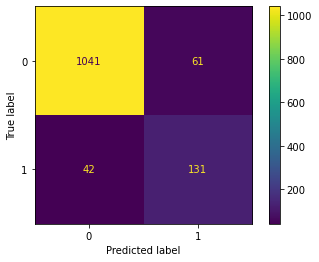

In [34]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Show result
print(classification_report(y_test, y_pred))

plot_confusion_matrix(model, X_test, y_test)

In [35]:
test = pd.read_csv("./test.csv")
id_submit = test['id']

In [36]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [37]:
test.shape

(750, 20)

In [38]:
test.drop(columns=['id'], inplace=True)

In [39]:
test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [40]:
test_encode = test.copy()
for col in test_encode.select_dtypes(include='O').columns:
    test_encode[col] = le.fit_transform(test_encode[col])

In [41]:
test_encode.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [42]:
scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge','total_eve_minutes', 'total_eve_calls','total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge','total_intl_minutes',
       'total_intl_calls', 'total_intl_charge','number_customer_service_calls']

In [43]:
scaler = MinMaxScaler()
scaler.fit(test_encode[scale_columns])
test_encode[scale_columns] = scaler.transform(test_encode[scale_columns])

In [44]:
test_encode.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,0.535865,1,0,1,0.490196,0.746675,0.572581,0.746653,0.499850,0.488189,0.500000,0.618379,0.506410,0.618440,0.529101,0.157895,0.529412,0.166667
1,1,0.493671,2,1,0,0.000000,0.623411,0.475806,0.623370,0.569624,0.503937,0.569710,0.488194,0.679487,0.488652,0.333333,0.315789,0.333333,0.000000
2,12,0.257384,1,0,0,0.000000,0.319834,0.250000,0.319770,0.830075,0.307087,0.830149,0.485322,0.557692,0.485816,0.693122,0.315789,0.694118,0.666667
3,46,0.388186,2,0,0,0.000000,0.526751,0.604839,0.526691,0.562406,0.582677,0.562633,0.251117,0.698718,0.251064,0.428571,0.157895,0.429412,0.500000
4,29,0.729958,1,0,0,0.000000,0.330476,0.298387,0.330377,0.739549,0.590551,0.739561,0.637524,0.660256,0.637589,0.820106,0.263158,0.821569,0.500000
5,14,0.594937,1,0,0,0.000000,0.213716,0.451613,0.213702,0.317293,0.204724,0.317410,0.636886,0.871795,0.636879,0.751323,0.315789,0.750980,0.333333
6,18,0.721519,0,0,0,0.000000,0.589713,0.661290,0.589637,0.000000,0.614173,0.000000,0.773452,0.423077,0.773759,0.666667,0.526316,0.666667,0.500000
7,10,0.299578,1,0,1,0.725490,0.613361,0.330645,0.613285,0.559699,0.511811,0.559802,0.325144,0.378205,0.325532,0.777778,0.315789,0.778431,0.500000
8,31,0.624473,0,0,0,0.000000,0.378067,0.443548,0.378021,0.723609,0.433071,0.723638,0.438417,0.615385,0.438298,0.587302,0.473684,0.588235,0.166667
9,13,0.497890,1,0,0,0.000000,0.433343,0.604839,0.433316,0.601805,0.629921,0.601911,0.294512,0.506410,0.294326,0.465608,0.157895,0.466667,0.833333


In [45]:
y_pred_submit = model.predict(test_encode)

In [45]:
y_pred_submit

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [46]:
submit_result = pd.DataFrame({'id': id_submit,'churn': y_pred_submit})
submit_result

,id,churn
0,1,0
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
745,746,0
746,747,0
747,748,0
748,749,0


In [47]:
submit_result.churn.replace([0,1],['no','yes'],inplace=True)
submit_result

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,yes
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


In [48]:
submit_result.to_csv("submit_1.csv", index=False)

#### 4. Oversampling data with SMOTE

In [49]:
from imblearn.over_sampling import SMOTE

def over_sampling(data):
    X = data.iloc[:, data.columns != 'churn']
    y = data.iloc[:, data.columns == 'churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
    # Upsampling = SMOTE
    smote = SMOTE()
    X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train,y_train)

    return X_train_oversampled, y_train_oversampled, X_test, y_test

ModuleNotFoundError: No module named 'imblearn'

In [50]:
X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled = over_sampling(df_encode)

In [51]:
# Check oversampled method
print("Numbers of train dataset: ", len(X_train_oversampled))
print("Numbers of test dataset: ", len(X_test_oversampled))
print("Total number of dataset: ", len(X_train_oversampled) + len(X_test_oversampled))

Numbers of train dataset:  5862
Numbers of test dataset:  850
Total number of dataset:  6712


In [52]:
X_train_oversampled.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,27,115,1,1,0,0,180.0,119,30.60,198.8,126,16.90,217.1,70,9.77,12.4,3,3.35,1
1,40,117,1,0,1,35,190.7,100,32.42,209.7,107,17.82,202.5,101,9.11,12.4,5,3.35,1
2,19,77,0,0,1,17,204.9,84,34.83,201.0,102,17.09,219.7,97,9.89,11.3,5,3.05,0
3,44,57,1,0,0,0,202.0,100,34.34,168.9,90,14.36,231.8,119,10.43,3.4,4,0.92,1
4,47,112,1,0,0,0,158.1,107,26.88,181.5,101,15.43,200.3,126,9.01,8.3,7,2.24,1


0    2931
1    2931
Name: churn, dtype: int64


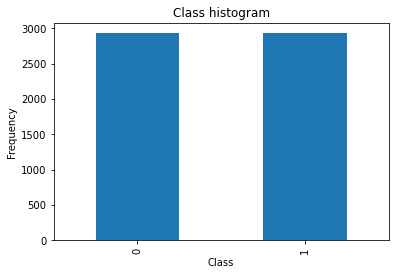

In [53]:
count_classes = pd.value_counts(y_train_oversampled['churn'], sort = True).sort_index()
print(count_classes)
count_classes.plot(kind = 'bar')
plt.title("Class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [55]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler

scale_columns = ['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge','total_eve_minutes', 'total_eve_calls','total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge','total_intl_minutes',
       'total_intl_calls', 'total_intl_charge','number_customer_service_calls']

In [56]:
scaler = MinMaxScaler()
scaler.fit(X_train_oversampled[scale_columns])
X_train_oversampled[scale_columns] = scaler.transform(X_train_oversampled[scale_columns])
X_test_oversampled[scale_columns] = scaler.transform(X_test_oversampled[scale_columns])

In [57]:
X_train_oversampled.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,27,0.471074,1,1,0,0.00,0.512091,0.721212,0.512048,0.553298,0.741176,0.553373,0.549620,0.400000,0.549803,0.642487,0.15,0.642994,0.111111
1,40,0.479339,1,0,1,0.70,0.542532,0.606061,0.542503,0.583635,0.629412,0.583497,0.512658,0.577143,0.512662,0.642487,0.25,0.642994,0.111111
2,19,0.314050,0,0,1,0.34,0.582930,0.509091,0.582831,0.559421,0.600000,0.559594,0.556203,0.554286,0.556556,0.585492,0.25,0.585413,0.000000
3,44,0.231405,1,0,0,0.00,0.574680,0.606061,0.574632,0.470081,0.529412,0.470203,0.586835,0.680000,0.586944,0.176166,0.20,0.176583,0.111111
4,47,0.458678,1,0,0,0.00,0.449787,0.648485,0.449799,0.505149,0.594118,0.505239,0.507089,0.720000,0.507034,0.430052,0.35,0.429942,0.111111
5,8,0.322314,1,0,0,0.00,0.189758,0.751515,0.189759,0.567771,0.535294,0.567780,0.644810,0.628571,0.644907,0.782383,0.10,0.783109,0.111111
6,48,0.256198,2,0,1,0.68,0.433001,0.721212,0.432898,0.632062,0.535294,0.631958,0.495443,0.588571,0.495779,0.637306,0.25,0.637236,0.111111
7,31,0.371901,1,0,0,0.00,0.266003,0.666667,0.266064,0.593654,0.464706,0.593648,0.434684,0.474286,0.435003,0.461140,0.20,0.460653,0.444444
8,29,0.309917,2,0,0,0.00,0.407681,0.593939,0.407631,0.860284,0.594118,0.860183,0.524810,0.697143,0.525042,0.590674,0.15,0.591171,0.222222
9,3,0.396694,0,0,0,0.00,0.482788,0.509091,0.482764,0.461731,0.505882,0.461690,0.485823,0.474286,0.486213,0.663212,0.30,0.664107,0.333333


In [58]:
X_test_oversampled.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1024,16,0.144628,2,0,0,0.0,0.508108,0.503030,0.508032,0.593098,0.605882,0.592993,0.501266,0.680000,0.501407,0.564767,0.25,0.564299,0.111111
2177,26,0.061983,2,0,0,0.0,0.435846,0.393939,0.435743,0.639299,0.529412,0.639162,0.375190,0.537143,0.375352,0.554404,0.40,0.554702,0.111111
1444,29,0.404959,1,0,0,0.0,0.568990,0.400000,0.568942,0.300306,0.611765,0.300262,0.591646,0.468571,0.592009,0.590674,0.10,0.591171,0.333333
3386,35,0.652893,2,0,0,0.0,0.479374,0.484848,0.479418,0.567492,0.700000,0.567453,0.504051,0.720000,0.504221,0.419689,0.10,0.420345,0.111111
3203,34,0.314050,2,0,0,0.0,0.353058,0.557576,0.353079,0.598107,0.770588,0.598232,0.610886,0.754286,0.611142,0.709845,0.15,0.710173,0.000000
721,11,0.694215,1,0,0,0.0,0.509815,0.672727,0.509705,0.487615,0.764706,0.487557,0.578734,0.525714,0.579066,0.512953,0.30,0.512476,0.222222
3516,30,0.566116,1,0,0,0.0,0.448080,0.581818,0.448126,0.756193,0.629412,0.756058,0.349873,0.480000,0.350028,0.554404,0.30,0.554702,0.222222
1113,26,0.037190,2,0,0,0.0,0.520626,0.624242,0.520582,0.597829,0.452941,0.597904,0.522532,0.417143,0.522791,0.450777,0.30,0.451056,0.222222
1138,41,0.400826,1,0,0,0.0,0.000000,0.000000,0.000000,0.444197,0.764706,0.444335,0.423038,0.502857,0.423185,0.352332,0.05,0.353167,0.444444
2528,34,0.537190,0,1,0,0.0,0.347937,0.503030,0.347892,0.330643,0.552941,0.330714,0.374430,0.542857,0.374789,0.709845,0.15,0.710173,0.333333


In [59]:
X_train_oversampled.shape

(5862, 19)

#### 5. Compare classifications model again with oversampled data

In [60]:
# Prepare models:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn:
results=[]
names=[]
# scoring='accuracy'
for name, model in models:
    model.fit(X_train_oversampled, y_train_oversampled)
    y_pred = model.predict(X_test_oversampled)
    result = 100*accuracy_score(y_test_oversampled, y_pred)
    results.append(result)
    names.append(name)
    print(name,':', result)
    Confusion_Matrix(y_test_oversampled, y_pred)

C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

LR : 73.88235294117646
Confusion Matrix: 
 [[537 184]
 [ 38  91]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.74      0.83       721
           1       0.33      0.71      0.45       129

    accuracy                           0.74       850
   macro avg       0.63      0.73      0.64       850
weighted avg       0.84      0.74      0.77       850



TN - True Negative 91
FP - False Positive 38
FN - False Negative 184
TP - True Positive 537
Accuracy Rate: 0.7388235294117647
Misclassification Rate: 0.2611764705882353
F1-Score: 0.6395993766043271
ROC-AUC 0.7251126235095529


****************************************


LDA : 73.29411764705883
Confusion Matrix: 
 [[530 191]
 [ 36  93]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.74      0.82       721
           1       0.33      0.72      0.45       129

    accuracy                           0.73       850


C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM : 54.8235294117647
Confusion Matrix: 
 [[402 319]
 [ 65  64]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.56      0.68       721
           1       0.17      0.50      0.25       129

    accuracy                           0.55       850
   macro avg       0.51      0.53      0.46       850
weighted avg       0.76      0.55      0.61       850



TN - True Negative 64
FP - False Positive 65
FN - False Negative 319
TP - True Positive 402
Accuracy Rate: 0.548235294117647
Misclassification Rate: 0.45176470588235296
F1-Score: 0.46338383838383834
ROC-AUC 0.5268414884581062


****************************************




In [83]:
# Use the removed high correlation columns data 
removed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   int32  
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   int32  
 3   international_plan             4250 non-null   int32  
 4   total_day_minutes              4250 non-null   float64
 5   total_day_calls                4250 non-null   int64  
 6   total_eve_minutes              4250 non-null   float64
 7   total_eve_calls                4250 non-null   int64  
 8   total_night_minutes            4250 non-null   float64
 9   total_night_calls              4250 non-null   int64  
 10  total_intl_calls               4250 non-null   int64  
 11  number_customer_service_calls  4250 non-null   int64  
 12  churn                          4250 non-null   i

In [84]:
X = removed_df.iloc[:, removed_df.columns != 'churn']
y = removed_df.iloc[:, removed_df.columns == 'churn']

In [85]:
X.shape

(4250, 12)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [87]:
print("Numbers of train dataset: ", len(X_train))
print("Numbers of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train) + len(X_test))

Numbers of train dataset:  2975
Numbers of test dataset:  1275
Total number of dataset:  4250


In [90]:
# Scale
scale_columns = ['account_length', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls',
        'total_intl_calls', 'number_customer_service_calls']

In [91]:
scaler = MinMaxScaler()
scaler.fit(X_train[scale_columns])
X_train[scale_columns] = scaler.transform(X_train[scale_columns])
X_test[scale_columns] = scaler.transform(X_test[scale_columns])

In [92]:
X_train.head(10)

,state,account_length,area_code,international_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_calls,number_customer_service_calls
3897,8,0.372294,1,0,0.576671,0.751515,0.692736,0.576471,0.434373,0.119718,0.315789,0.111111
1950,33,0.484848,2,0,0.697866,0.654545,0.723351,0.823529,0.487090,0.577465,0.105263,0.333333
2600,43,0.320346,1,0,0.867994,0.642424,0.523240,0.676471,0.570737,0.584507,0.263158,0.000000
264,39,0.510823,1,0,0.335135,0.400000,0.714723,0.670588,0.334588,0.302817,0.157895,0.333333
385,33,0.389610,0,0,0.380370,0.454545,0.543557,0.511765,0.692039,0.394366,0.105263,0.000000
3003,18,0.251082,1,0,0.338549,0.721212,0.374339,0.676471,0.740721,0.295775,0.315789,0.222222
3541,35,0.294372,1,0,0.696444,0.460606,0.214862,0.588235,0.536848,0.485915,0.157895,0.000000
2357,2,0.467532,1,0,0.316358,0.545455,0.733370,0.576471,0.541958,0.669014,0.315789,0.666667
3650,14,0.463203,2,1,0.390612,0.412121,0.400223,0.552941,0.579613,0.478873,0.052632,0.111111
701,27,0.272727,2,1,0.361878,0.563636,0.453382,0.611765,0.603012,0.535211,0.684211,0.000000


In [93]:
# Prepare models:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn:
results=[]
names=[]
# scoring='accuracy'
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    result = 100*accuracy_score(y_test, y_pred)
    results.append(result)
    names.append(name)
    print(name,':', result)
    Confusion_Matrix(y_test, y_pred)

C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR : 86.82352941176471
Confusion Matrix: 
 [[1083   19]
 [ 149   24]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      1102
           1       0.56      0.14      0.22       173

    accuracy                           0.87      1275
   macro avg       0.72      0.56      0.58      1275
weighted avg       0.84      0.87      0.83      1275



TN - True Negative 24
FP - False Positive 149
FN - False Negative 19
TP - True Positive 1083
Accuracy Rate: 0.8682352941176471
Misclassification Rate: 0.13176470588235295
F1-Score: 0.5751213938874608
ROC-AUC 0.5607434721945386


****************************************


LDA : 86.66666666666667
Confusion Matrix: 
 [[1069   33]
 [ 137   36]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1102
           1       0.52      0.21      0.30       173

    accuracy                           0.87 

C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN : 85.6470588235294
Confusion Matrix: 
 [[1086   16]
 [ 167    6]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92      1102
           1       0.27      0.03      0.06       173

    accuracy                           0.86      1275
   macro avg       0.57      0.51      0.49      1275
weighted avg       0.79      0.86      0.81      1275



TN - True Negative 6
FP - False Positive 167
FN - False Negative 16
TP - True Positive 1086
Accuracy Rate: 0.8564705882352941
Misclassification Rate: 0.14352941176470588
F1-Score: 0.4919157275845174
ROC-AUC 0.5100815123317562


****************************************


CART : 87.2156862745098
Confusion Matrix: 
 [[1007   95]
 [  68  105]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      1102
           1       0.53      0.61      0.56       173

    accuracy                           0.87  

C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM : 86.4313725490196
Confusion Matrix: 
 [[1102    0]
 [ 173    0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93      1102
           1       0.00      0.00      0.00       173

    accuracy                           0.86      1275
   macro avg       0.43      0.50      0.46      1275
weighted avg       0.75      0.86      0.80      1275



TN - True Negative 0
FP - False Positive 173
FN - False Negative 0
TP - True Positive 1102
Accuracy Rate: 0.864313725490196
Misclassification Rate: 0.13568627450980392
F1-Score: 0.4636095919225915
ROC-AUC 0.5


****************************************




C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled = over_sampling(removed_df)

0    2931
1    2931
Name: churn, dtype: int64


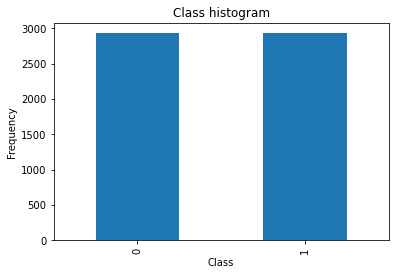

In [97]:
count_classes = pd.value_counts(y_train_oversampled['churn'], sort = True).sort_index()
print(count_classes)
count_classes.plot(kind = 'bar')
plt.title("Class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [99]:
X_train_oversampled.shape

(5862, 12)

In [100]:
# Prepare models:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn:
results=[]
names=[]
# scoring='accuracy'
for name, model in models:
    model.fit(X_train_oversampled, y_train_oversampled)
    y_pred = model.predict(X_test_oversampled)
    result = 100*accuracy_score(y_test_oversampled, y_pred)
    results.append(result)
    names.append(name)
    print(name,':', result)
    Confusion_Matrix(y_test_oversampled, y_pred)

C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

LR : 68.58823529411765
Confusion Matrix: 
 [[503 218]
 [ 49  80]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.70      0.79       721
           1       0.27      0.62      0.37       129

    accuracy                           0.69       850
   macro avg       0.59      0.66      0.58       850
weighted avg       0.81      0.69      0.73       850



TN - True Negative 80
FP - False Positive 49
FN - False Negative 218
TP - True Positive 503
Accuracy Rate: 0.6858823529411765
Misclassification Rate: 0.31411764705882356
F1-Score: 0.5824832450590631
ROC-AUC 0.6588986012106356


****************************************


LDA : 73.29411764705883
Confusion Matrix: 
 [[530 191]
 [ 36  93]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.74      0.82       721
           1       0.33      0.72      0.45       129

    accuracy                           0.73       850

C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thinh Tran\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM : 83.52941176470588
Confusion Matrix: 
 [[647  74]
 [ 66  63]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       721
           1       0.46      0.49      0.47       129

    accuracy                           0.84       850
   macro avg       0.68      0.69      0.69       850
weighted avg       0.84      0.84      0.84       850



TN - True Negative 63
FP - False Positive 66
FN - False Negative 74
TP - True Positive 647
Accuracy Rate: 0.8352941176470589
Misclassification Rate: 0.16470588235294117
F1-Score: 0.6880276003817074
ROC-AUC 0.6928684320872174


****************************************


